<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Общий-анализ-данных" data-toc-modified-id="Общий-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Сравнение-средней-выручки-по-двум-тарифам" data-toc-modified-id="Сравнение-средней-выручки-по-двум-тарифам-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Сравнение средней выручки по двум тарифам</a></span></li><li><span><a href="#Сравнение-средней-выручки-по-регионам" data-toc-modified-id="Сравнение-средней-выручки-по-регионам-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Сравнение средней выручки по регионам</a></span></li></ul></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общие выводы</a></span></li></ul></div>

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

# Определение перспективного тарифа для телеком-компании

## Описание проекта

В рамках данного кейса нам предстоит стать аналитиком федерального оператора сотовой связи «Мегалайн». Данная компания предлагает своим клиентам два тарифных плана: «Смарт» и «Ультра». 

**Заказчик** - коммерческий департамент оператора. Он решил провести корректировку рекламного бюджета, для чего требуется определить, какой тариф приносит больше денег. Для этого нам предстоит провести предварительный анализ тарифов на небольшой выборке клиентов. 

**Входные данные** - общая информация о 500 пользователях «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

**Ход исследования**

Данное исследование будет проходить в несколько этапов:
1. Описание проекта
2. Описание данных
3. Подготовка данных
    * Преобразование типов данных
    * Выявление и исправление ошибок в данных
    * Расчет дополнительных параметров
4. Общий анализ данных
5. Проверка гипотез

Также вначале приведем краткое описание тарифов:
**Тариф «Смарт»**
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей

Таблица users состоит из 8 характеристик, раскрывающих информацию о пользователях:
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tariff` — название тарифного плана

Перейдем к следующей таблице calls, в которой содержится информация о звонках. Всего она имеет 4 столбца:
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

Третья таблица - messages с информацией о сообщениях, содержит только 3 столбца:
* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

Следующая таблица internet рассказывает об интернет-сессиях абонентов и включает 4 характеристики:
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

Наконец, последняя таблица tariffs содержит общую информацию о тарифах. Она включает в себя 8 столбцов:
* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Обзор данных

Как обычно, начнем с загрузки необходимых данных и выведения основной информации по каждому набору данных.

In [2]:
try:
    data_users = pd.read_csv('users.csv')
    data_calls = pd.read_csv('calls.csv')
    data_messages = pd.read_csv('messages.csv')
    data_internet = pd.read_csv('internet.csv')
    data_tariffs = pd.read_csv('tariffs.csv')
except:
    data_users = pd.read_csv('/datasets/users.csv')
    data_calls = pd.read_csv('/datasets/calls.csv')
    data_messages = pd.read_csv('/datasets/messages.csv')
    data_internet = pd.read_csv('/datasets/internet.csv')
    data_tariffs = pd.read_csv('/datasets/tariffs.csv')

In [3]:
count = 0
for data in [data_users, data_calls, data_messages, data_internet, data_tariffs]:
    name = ['data_users', 'data_calls', 'data_messages', 'data_internet', 'data_tariffs']
    print(f'Инфографика по данным из таблицы {name[count]}')
    display(data.info())
    display(data.head())
    count += 1

Инфографика по данным из таблицы data_users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Инфографика по данным из таблицы data_calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Инфографика по данным из таблицы data_messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Инфографика по данным из таблицы data_internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Инфографика по данным из таблицы data_tariffs
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Что можно сказать об имеющихся данных? Прежде всего, в глаза бросается тот факт, что в исходных данных практически отсутствуют пропуски. Исключением является столбец `churn_date` в таблице **users**, что довольно логично, если исходить из описания столбца - пропуски у тех пользователей, которые все еще пользуются тарифом. Согласно данному столбцу, только 38 абонентов из 500 присутствующих в выборке отказались от услуг в анализируемый период. 

По предварительному анализу сложно сказать о наличии или отсутствии аномалий и ошибок, а значит этому стоит уделить внимание при дальнейшей работе.

Из наиболее важного также хотелось бы отметить наличие некоторых столбцов с неоптимальным типом, а именно: `reg_date`, `call_date`, `message_date` и `session_date`. Все эти переменные будет необходимо привести к типу **datetime** для удобства дальнейшего использования.

## Подготовка данных

Переходим к следующему этапу работы над данным кейсом - подготовкой данных. На данном этапе нам необходимо выполнить несколько важных действий, которые значительно упростит дальнейший анализ. Прежде всего, необходимо, как уже упоминалось ранее, привести часть переменных к нужному типу. Также стоит проверить данные на наличие потенциальных аномалий, которые могут негативно повлиять на будущие результаты. Наконец, для дальнейшего анализа нам будет необходимо рассчитать несколько дополнительных переменных. 

Начнем с преобразования типа некоторых характеристик. К ним относятся переменные, отвечающие за даты: `reg_date`, `call_date`, `message_date` и `session_date`. Все они в исходном наборе обладали типом **object**, который не совсем подходит для подобных характеристик. Заменит данный тип на **datetime**.

In [4]:
for data in [data_users['reg_date'], data_calls['call_date'], data_messages['message_date'], data_internet['session_date']]:
    data = pd.to_datetime(data, format = '%Y-%m-%d')

Также нам было сказано, что «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

Значит, нам необходимо провести два округления. Первое, для **длительности звонков**, должно быть проведено сейчас - тогда сумма по месяцам будет посчитана правильно. Второе округление для **объема веб-трафика** будет произведено позднее, после расчета суммы за месяц. 

Итак, округлим секунды до минут для каждого звонка.

In [5]:
data_calls['duration'] = np.ceil(data_calls['duration'])

Теперь перейдем к этапу анализа и выявления аномалий и ошибок в данных. Проверим несколько предположений относительно того, где могли возникнуть ошибки. 

Проверим несколько предпосылок:
* Возраст всех индивидов в пределах разумного
* Нет индивидов, у которых дата регистрации случилась позже даты отказа от пользования услугами
* Нет задвоения индивидов - разные id с одинаковыми полными именами
* Длительность звонков в разумных пределах

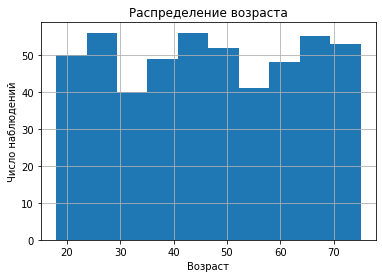

Минимальное значение возраста: 18
Максимальное значение возраста: 75


In [6]:
data_users['age'].hist()
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Число наблюдений')
plt.show()
print('Минимальное значение возраста:', data_users['age'].min())
print('Максимальное значение возраста:', data_users['age'].max())

In [7]:
data_users.query('churn_date < reg_date')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff


In [8]:
data_users['full_name'] = data_users['first_name'] + data_users['last_name']
len(data_users['full_name'].unique())

500

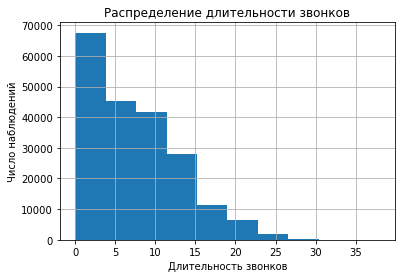

Минимальная длительность звонка: 0.0
Максимальная длительность звонка: 38.0


In [9]:
data_calls['duration'].hist()
plt.title('Распределение длительности звонков')
plt.xlabel('Длительность звонков')
plt.ylabel('Число наблюдений')
plt.show()
print('Минимальная длительность звонка:', data_calls['duration'].min())
print('Максимальная длительность звонка:',data_calls['duration'].max())

Как можно заметить по полученным результатам, все введенные нами предпосылки были выполнены в реальных данных. В таком случае, можно предположить, что ошибок и аномалий в исходной выборке нет.

Наконец, перейдем к расчету дополнительных переменных. Нам необходимо рассчитать следующие характеристики для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя.

Для расчета последнего параметра вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, после чего умножим остаток на значение из тарифного плана и прибавим абонентскую плату, соответствующую тарифному плану.

Произведем необходимые расчеты. Для этого сначала нам необходимо вычленить из даты месяц, когда был совершен звонок или смс или произведена интернет-сессия. 

In [10]:
count = 0
for data in [data_users, data_calls, data_messages, data_internet]:
    name = ['reg_date', 'call_date', 'message_date', 'session_date']
    data['month'] = pd.DatetimeIndex(data[name[count]]).month
    count += 1    

Теперь посчитаем, **сколько звонков** совершил каждый из пользователей в месяц и какова *их суммарная длительность*. 

In [11]:
calls_pivot = data_calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc=['count','sum'])
calls_pivot.head()

count      sum
              duration duration
user_id month                  
1000    5           22    159.0
        6           43    172.0
        7           47    340.0
        8           52    408.0
        9           58    466.0

Посчитаем также **количество отправленных сообщений** по месяцам, после чего объединим полученные рассчеты с предыдущей таблицей. 

In [12]:
messages_pivot = data_messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc=['count'])
full_pivot = calls_pivot.merge(messages_pivot, on=['user_id', 'month'], how='outer')
full_pivot = full_pivot.sort_values(by='user_id')
full_pivot.head()

count      sum count
              duration duration    id
user_id month                        
1000    5         22.0    159.0  22.0
        6         43.0    172.0  60.0
        7         47.0    340.0  75.0
        8         52.0    408.0  81.0
        9         58.0    466.0  57.0

Наконец, просуммируем **длительность интернет-сессий** за каждый месяц по пользователям, и, как и прежде, объединим с предыдущими расчетами. 

In [13]:
internet_pivot = data_internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc=['sum'])
full_pivot = full_pivot.merge(internet_pivot, on=['user_id', 'month'], how='outer')
full_pivot = full_pivot.sort_values(by='user_id')
full_pivot.head()

count      sum count       sum
              duration duration    id   mb_used
user_id month                                  
1000    5         22.0    159.0  22.0   2253.49
        6         43.0    172.0  60.0  23233.77
        7         47.0    340.0  75.0  14003.64
        8         52.0    408.0  81.0  14055.93
        9         58.0    466.0  57.0  14568.91

Добавим в получившуюся таблицу информацию о **месте проживания абонента**, а также о его **тарифном плане**, предварительно обновив индексы. 

In [14]:
full_pivot = full_pivot.reset_index()
full_pivot = full_pivot.merge(data_users[['user_id', 'city', 'tariff']], on='user_id', how='inner')

In [15]:
full_pivot.columns = ['user_id', 'user_id2', 'month', 'calls_count', 'calls_amount', 'messages_count', 'internet_amount', 'city',
                      'tariff']
del full_pivot['user_id2']

В данных образовались пропуски - в какой-то месяц абонент мог не пользоваться одной из возможных услуг. Заполним эти пропуски наиболее подходящим по смыслу значением - нулем. 

In [16]:
full_pivot = full_pivot.fillna(0)

Перед подсчетом помесячной **выручки** с каждого пользователя вначале необходимо совершить два дополнительных действия - рассчитать траты сверх тарифа, а также произвести второе округление по **объему интернет-сессии**. 

In [17]:
full_pivot['internet_amount'] = full_pivot['internet_amount']/1024
full_pivot['internet_amount'] = np.ceil(full_pivot['internet_amount'])

In [18]:
full_pivot.loc[(full_pivot['calls_amount'] > 500) & (full_pivot['tariff'] == "smart"), 'over_call'] = full_pivot['calls_amount'] - 500
full_pivot.loc[(full_pivot['calls_amount'] > 3000) & (full_pivot['tariff'] == "ultra"), 'over_call'] = full_pivot['calls_amount'] - 3000

full_pivot.loc[(full_pivot['messages_count'] > 50) & (full_pivot['tariff'] == "smart"), 'over_messages'] = full_pivot['messages_count'] - 50
full_pivot.loc[(full_pivot['messages_count'] > 1000) & (full_pivot['tariff'] == "ultra"), 'over_messages'] = full_pivot['messages_count'] - 1000


full_pivot.loc[(full_pivot['internet_amount'] > 15) & (full_pivot['tariff'] == "smart"), 'over_internet'] = full_pivot['internet_amount'] - 15
full_pivot.loc[(full_pivot['internet_amount'] > 30) & (full_pivot['tariff'] == "ultra"), 'over_internet'] = full_pivot['internet_amount'] - 30

In [19]:
full_pivot.isna().sum()

user_id               0
month                 0
calls_count           0
calls_amount          0
messages_count        0
internet_amount       0
city                  0
tariff                0
over_call          2460
over_messages      2650
over_internet      1776
dtype: int64

In [20]:
full_pivot = full_pivot.fillna(0)

И теперь приступим к расчету **выручки**.

In [21]:
full_pivot.loc[full_pivot['tariff'] == "smart", 'revenue'] = 550 + full_pivot['over_call']*3 + full_pivot['over_messages']*3 + full_pivot['over_internet']*200
full_pivot.loc[full_pivot['tariff'] == "ultra", 'revenue'] = 1950 + full_pivot['over_call'] + full_pivot['over_messages'] + full_pivot['over_internet']*150

Посмотрим на данные после совершенных преобразований, проверив, что все было выполнено успешно.

In [22]:
full_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          3214 non-null   int64  
 1   month            3214 non-null   int64  
 2   calls_count      3214 non-null   float64
 3   calls_amount     3214 non-null   float64
 4   messages_count   3214 non-null   float64
 5   internet_amount  3214 non-null   float64
 6   city             3214 non-null   object 
 7   tariff           3214 non-null   object 
 8   over_call        3214 non-null   float64
 9   over_messages    3214 non-null   float64
 10  over_internet    3214 non-null   float64
 11  revenue          3214 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 455.5+ KB


In [23]:
full_pivot.head()

,user_id,month,calls_count,calls_amount,messages_count,internet_amount,city,tariff,over_call,over_messages,over_internet,revenue
0,1000,5,22.0,159.0,22.0,3.0,Краснодар,ultra,0.0,0.0,0.0,1950.0
1,1000,6,43.0,172.0,60.0,23.0,Краснодар,ultra,0.0,0.0,0.0,1950.0
2,1000,7,47.0,340.0,75.0,14.0,Краснодар,ultra,0.0,0.0,0.0,1950.0
3,1000,8,52.0,408.0,81.0,14.0,Краснодар,ultra,0.0,0.0,0.0,1950.0
4,1000,9,58.0,466.0,57.0,15.0,Краснодар,ultra,0.0,0.0,0.0,1950.0


Итак, нами была проведена работа по подготовке данных. Мы исправили тип некоторых переменных, что позволило нам провести некоторые последующие расчеты. Мы не обнаружили никаких ошибок или аномалии в данных. Также мы создали несколько дополнительных расчетных переменных, которые пригодятся нам при дальнейшем анализе.

По итогу мы получили датафрейм, который хранит наиболее значимую для нас информацию об абоненте - количество использований каждой из услуг от оператора, место проживания абонента, его тариф, а также выручка за каждый месяц, в течении которого абонент был подключен к оператору. 

## Общий анализ данных

Перейдем к более детальному анализу выборки. На данном этапе мы более детально рассмотрим поведения клиентов оператора. Для этого проанализируем три основных показателя: **длительность** звонков, **общее число сообщений** и **объем интернет-трафика** для пользователей каждого из двух рассматриваемых тарифов в месяц. 

Для этого выведем описательные статистики для каждой из рассматриваемых характеристик по двум группам. Начнем с пользователей тарифа «Смарт».

Рассчитаем основные описательные статистики для пользователей тарифа "Смарт" в месяц за весь рассматриваемый период и помесячно. 

In [24]:
features = ['calls_amount', 'messages_count', 'internet_amount']

display(full_pivot.query('tariff == "smart"')[features].describe())
full_pivot.query('tariff == "smart"')[features].var()

,calls_amount,messages_count,internet_amount
count,2229.000000,2229.000000,2229.000000
mean,417.934948,33.384029,16.328847
std,190.313730,28.227876,5.747061
min,0.000000,0.000000,0.000000
25%,282.000000,10.000000,13.000000
50%,422.000000,28.000000,17.000000
75%,545.000000,51.000000,20.000000
max,1435.000000,143.000000,38.000000


calls_amount       36219.315784
messages_count       796.812958
internet_amount       33.028705
dtype: float64

In [25]:
full_pivot.query('tariff == "smart"').pivot_table(index='month', values = features, aggfunc = ['count', 'mean', 'std', 'var'])

count                                        mean  \
      calls_amount internet_amount messages_count calls_amount   
month                                                            
1               34              34             34   203.852941   
2               58              58             58   298.689655   
3               77              77             77   390.051948   
4              112             112            112   367.133929   
5              141             141            141   387.361702   
6              164             164            164   395.640244   
7              201             201            201   408.353234   
8              235             235            235   421.468085   
9              260             260            260   428.611538   
10             294             294            294   426.136054   
11             316             316            316   435.265823   
12             337             337            337   478.560831   

                                              std                  \
      internet_amount messages_count calls_amount internet_amount   
month                                                               
1            8.735294      18.235294   154.231454        6.277950   
2           11.844828      24.086207   190.820041        6.095157   
3           15.233766      31.857143   191.893604        5.705252   
4           13.625000      30.741071   186.489161        5.594600   
5           15.907801      33.773050   186.601343        5.862594   
6           15.951220      33.402439   175.336587        5.649046   
7           15.875622      33.751244   179.583601        5.780956   
8           16.736170      33.638298   186.530382        5.480986   
9           16.392308      33.638462   183.126576        5.087643   
10          16.880952      33.765306   188.128510        5.735594   
11          17.000000      34.075949   177.778618        5.213535   
12          18.201780      35.994065   199.245131        5.457705   

                               var                                 
      messages_count  calls_amount internet_amount messages_count  
month                                                              
1          16.197753  23787.341355       39.412656     262.367201  
2          21.750809  36412.287961       37.150938     473.097701  
3          26.804710  36823.155161       32.549897     718.492481  
4          24.538532  34778.207127       31.299550     602.139559  
5          27.036845  34820.061094       34.370010     730.990983  
6          28.404337  30742.918861       31.911716     806.806374  
7          28.282288  32250.269602       33.419453     799.887811  
8          28.952677  34793.583379       30.041207     838.257501  
9          28.117927  33535.342723       25.884110     790.617820  
10         28.567673  35392.336375       32.897042     816.111966  
11         28.389031  31605.237050       27.180952     805.937071  
12         30.576990  39698.622033       29.786544     934.952346

Для начала рассмотрим общую описательную статистику. Суммарная средняя **продолжительность звонков** у пользователей тарифа "Смарт" составляет почти 420 минут, что в переводе на часы составляет 7 часов. В целом, для современного мира это не слишком большая величина - вероятно, многие предпочитают альтернативные методы коммуникаций, по типу специальных мессенджеров. В то же время стандартная ошибка для средней продолжительности звонков составляет около 190 минут - разброс значений переменной присутствует, но он не критичен, при этом выборка обладает средней вариабельностью.

Среднее **число отправленных в месяц СМС** составляет около 33 штук, что также не много. Опять-таки, подобное небольшое значение обусловлено популярностью альтернативных способов связи. Стандартное отклонение, как и дисперсия, довольно высоки - это говорит о существенной мере рассеянности выборки и о большой вариабельности среди значений.

Наконец, средний **объем потребляемого трафика** для интернет-сессий составляет около 16 гигабайт, что даже больше объема, включенного в пакет. Интернет действительно популярен в использовании, так что полученные результаты вполне разумны. Данная характеристика обладает наименьшим разбросом среди значений - стандартное отклонение составляет 5 гигабайт. 

Теперь немного поговорим о помесячных показателях. Как можно заметить, в течение года наблюдается рост числа абонентов, и описательные статистики по каждой из характеристик становятся ближе к средним значениям за год. Сильнее всего выделяются первые два месяца: январь и февраль, - именно тогда описательная статистика наиболее сильно разнится со средними значениями за год. В целом, это довольно логично - в эти месяца доля абонентов относительно итоговой выборки была невелика, а значит их поведение могло сильно отличаться от среднего поведения итоговой группы. 

Что еще можно отметить из помесячной таблицы? Прежде всего, средние значения всех характеристик преимущественно растут в течениe года. В некотором роде исключением можно посчитать **количество СМС** - во второй половине года наблюдаются постоянные колебания, хотя к последним двум месяцам средние значения все-таки выросли. 

Относительно стандартного отклонения все менее однозначно. Разброс значений для **суммарной продолжительности звонков** в первые месяцы был весьма велик, однако постепенно он начал снижаться. В середине года наступила точка перегиба, после которой разброс значений снова начал расти. У **количества СМС**, напротив, вариабельность преимущественно увеличивалась. Наконец, у суммарного **объема интрнет-трафика** разброс значений все время был на примерно одном уровне. 

Теперь детальнее рассмотрим распределение для каждой из характеристик клиентов с тарифом «Смарт».

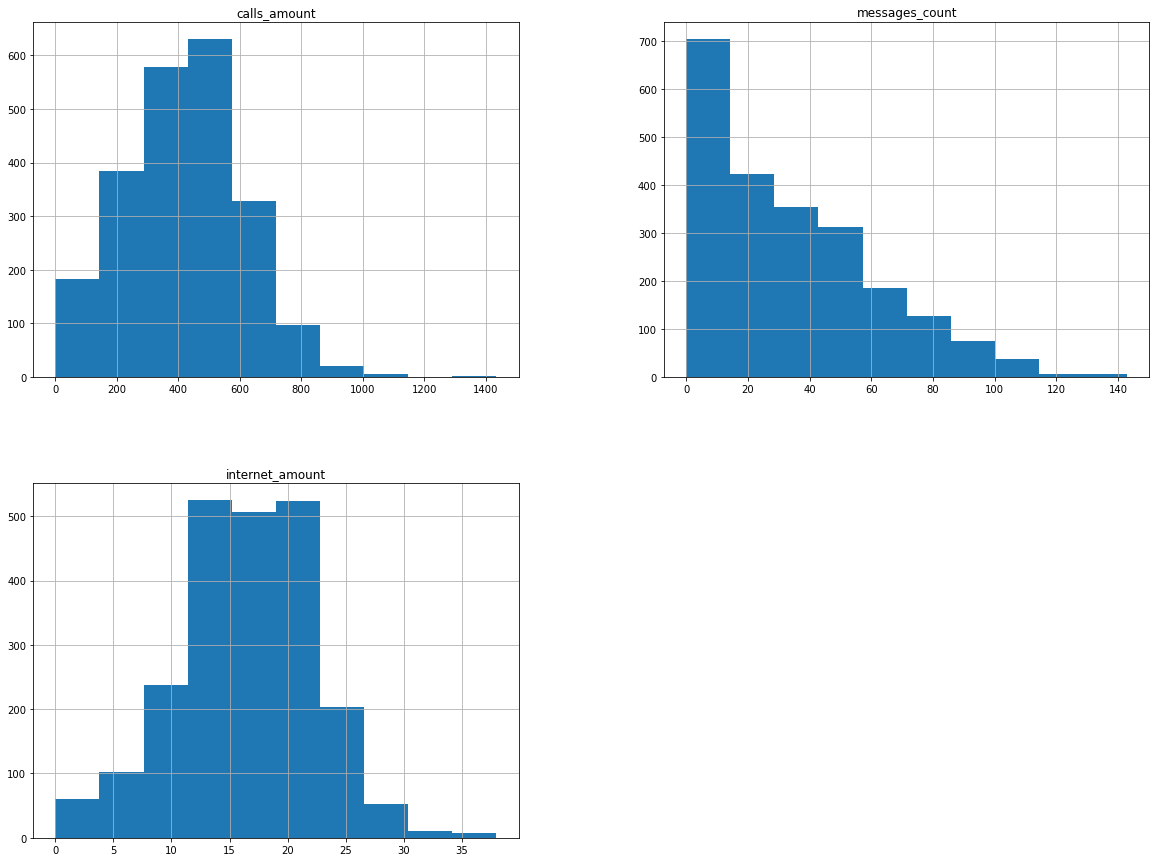

In [26]:
full_pivot.query('tariff == "smart"')[features].hist(figsize=(20,15))
plt.show()

Оценка распределений на глаз является довольно грубой формой, ведь для этого лучше подойдут специальные тесты, однако в рамках данного кейса обойдемся лишь гистограммами. 

Распределение средней длительности звонков в месяц довольно близко к нормальному, но таковым не является - возможно, для описания данной характеристики лучше подойдет распределение Пуассона. Распределение числа отправленных СМС весьма далеко от нормального - вполне возможно, что оно больше походит на Геометрическое распределение. Распределение объема израсходованного интернет трафика, в целом, можно описать как нормальное. 

Повторим проделанные нами ранее действия для клиентов с тарифом «Ультра». Начнем с предоставления описательных статистик.

In [27]:
display(full_pivot.query('tariff == "ultra"')[features].describe())
full_pivot.query('tariff == "ultra"')[features].var()

,calls_amount,messages_count,internet_amount
count,985.000000,985.000000,985.000000
mean,526.623350,49.363452,19.494416
std,317.606098,47.804457,9.853511
min,0.000000,0.000000,0.000000
25%,284.000000,6.000000,12.000000
50%,518.000000,38.000000,19.000000
75%,752.000000,79.000000,27.000000
max,1673.000000,224.000000,49.000000


calls_amount       100873.633397
messages_count       2285.266143
internet_amount        97.091686
dtype: float64

In [28]:
full_pivot.query('tariff == "ultra"').pivot_table(index='month', values = features, aggfunc = ['count', 'mean', 'std', 'var'])

count                                        mean  \
      calls_amount internet_amount messages_count calls_amount   
month                                                            
1                9               9              9   428.111111   
2               24              24             24   297.125000   
3               37              37             37   489.648649   
4               55              55             55   458.018182   
5               67              67             67   510.328358   
6               84              84             84   479.702381   
7               91              91             91   545.791209   
8              107             107            107   510.775701   
9              115             115            115   539.443478   
10             123             123            123   558.081301   
11             134             134            134   541.380597   
12             139             139            139   592.805755   

                                              std                  \
      internet_amount messages_count calls_amount internet_amount   
month                                                               
1           13.222222      33.777778   269.757968        6.666667   
2           12.000000      21.958333   296.512528       10.446551   
3           17.648649      32.297297   333.743765       10.693238   
4           16.963636      31.563636   267.682405        9.457436   
5           19.373134      37.850746   289.603511        9.779130   
6           18.940476      41.726190   302.549081        9.077114   
7           20.505495      49.846154   307.119322        9.819905   
8           19.598131      48.439252   312.980026       10.254184   
9           19.243478      52.286957   325.141162        9.287410   
10          20.065041      58.430894   326.289110        9.552907   
11          19.805970      55.791045   310.757232        9.684867   
12          21.741007      60.611511   342.456321       10.160550   

                                var                                 
      messages_count   calls_amount internet_amount messages_count  
month                                                               
1          30.670742   72769.361111       44.444444     940.694444  
2          26.773574   87919.679348      109.130435     716.824275  
3          41.621886  111384.900901      114.345345    1732.381381  
4          37.513831   71653.870034       89.443098    1407.287542  
5          40.306874   83870.193578       95.631389    1624.644052  
6          44.567899   91535.946500       82.394005    1986.297619  
7          48.703621   94322.278144       96.430525    2372.042735  
8          46.601923   97956.496385      105.148298    2171.739199  
9          46.398874  105716.775286       86.255988    2152.855530  
10         51.934398  106464.583500       91.258030    2697.181661  
11         49.768951   96570.057064       93.796656    2476.948491  
12         51.787821  117276.331561      103.236784    2681.978417

Как и до этого начнем в рассмотрения общей описательной статистики за год в целом.

Суммарная средняя **продолжительность звонков** у пользователей тарифа "Ультра" составляет порядка 526 минут, что в переводе на часы составляет почти 9 часов. Пусть данная величина также не слишком велика, она все-таки больше среднего для пользователей тарифа "Смарт". Видимо, тариф "Ультра" подключают те, кто осознает, что им действительно понадобится больший пакет услуг. Стандартное отклонение составляет 317 минут, что все-таки выше среднего, однако оно не достигает критического уровня. Таким образом, мы можем сделать вывод о том, что вариабельность в данной характеристики несколько выше среднего.

Среднее **число отправленных в месяц СМС** составляет почти 50 штук, что также не много, но, опять-таки, выше чем для пользователей тарифа "Смарт". Между тем, стандартное отклонение, как и дисперсия, также довольно высоки - это говорит о существенной мере рассеяности выборки и о большой вариабельности среди значений.

Наконец, средний **объем потребляемого трафика** для интернет-сессий составляет около 20 гигабайт, что все-таки меньше объема, включенного в пакет. Видимо, те, кому интернет нужен в существенном объеме, используют альтернативные способы его получения (роутеры и т.д.), а на потребление за счет оператора приходится меньший объем. Данная характеристика также обладает наименьшим разбросом среди значений - стандартное отклонение составляет 9 гигабайт. 

Также затронем помесячные данные. Как и в случае с абонентами тарифа "Смарт", число пользователей тарифа "Ультра" растет в течениe года, хотя их итоговое число все-таки меньше по сравнению с другой группой. Сильнее всего вновь выделяются первые два месяца: январь и февраль, - именно тогда описательная статистика наиболее сильно разнится со средними значениями за год.

Рост средних значений всех характеристик для данной группы выражен не так ярко - преимущественно стабильный рост показывает только характеристика числа отправленных СМС, в то время как для двух других показателей наблюдаются некоторые колебания.

Стандартное отклонение для данной категории также сильно зависит от переменной, для которой оно рассчитывается. Разброс суммарной длительности звонков в целом увеличивается в течении рассматриваемого периода. У количества СМС вариабельность также преимущественно увеличивается, но довольно скачкообразно с периодическим небольшим снижением. Наконец, у суммарного объема интрнет-трафика разброс значений примерно одинаковый в течении рассматриваемого периода, однако также наблюдаются скачки на 2, 3, 8 и 12 месяца. 

Также рассмотрим распределение для каждой из характеристик клиентов с тарифом «Ультра».

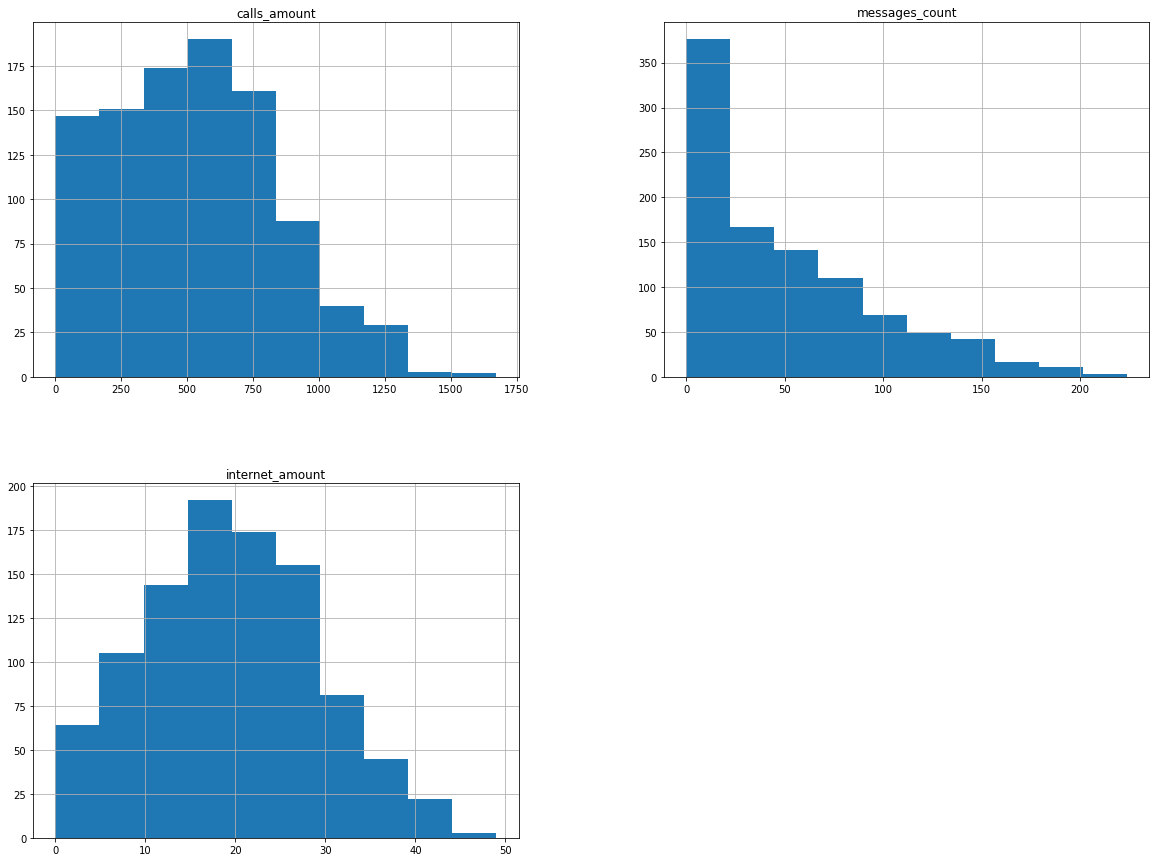

In [29]:
full_pivot.query('tariff == "ultra"')[features].hist(figsize=(20,15))
plt.show()

Как можно заметить, полученные гистограммы несколько разнятся по сравнению с теми, что мы построили для пользователей тарифа "Смарт". Однако в целом, если говорить о распределениях, можно сделать примерно те же предпосылки. Длительность звонков стала еще менее похожа на нормальное - для данной характеристики, вероятно, больше подошло бы распределение Пуассона. Количество отправленных СМС, как и до этого, вероятно, описывается Геометрическим распределением. Наконец, относительно объема потребляемого интернет-трафика затруднительно сделать конкретный вывод - подобный график можно с натяжкой отнести как к нормальному распределению, так и к распределению Пуассона.

В данном пункте мы попытались описать типичное поведение абонентов для каждого из предлагаемых оператором тарифов. По итогу мы получили следующие выводы:
* Средние значения для продолжительности звонков, объема трафика и количества СМС выше у пользователей тарифа "Ультра"
* Наибольшей вариабельностью в значениях в обеих группах обладает характеристика, отвечающая за число отправленных СМС, а наименьшей - объем интернет-трафика
* Характеристика, обладающая распределением, наиболее близким к нормальному - объем интернет-трафика. Количество отправленных СМС, вероятно, описывается Геометрическим распределением, а суммарная длительность звонков - распределением Пуассона

## Проверка гипотез

Перейдем к завершающему пункту нашей работы - проверке основных гипотез по имеющимся данным. Всего на данном этапе будет проработано две основные гипотезы. Рассмотрим каждую из них подробнее. 

### Сравнение средней выручки по двум тарифам

Начнем с анализа средней выручки по двум имеющимся тарифам. Есть предположение, что данный показатель разнится для пользователей разных тарифных групп. Проверим, так ли это. 

Для начала сформулируем основные гипотезы, которые нам будет обходимо проверить.

Нулевая гипотеза имеет следующий вид: средняя выручка пользователей тарифов «Ультра» и «Смарт» значимо не различается. Т.е. Н0: Е(выручка по пользователям тарифа "Ультра") = Е(выручка по пользователям тарифа "Смарт").

Альтернативная гипотеза, соответственно, будет иметь следующий вид: средняя выручка пользователей тарифов «Ультра» и «Смарт» значимо различается. Т.е. Н1: Е(выручка по пользователям тарифа "Ультра") ≠ Е(выручка по пользователям тарифа "Смарт"). Мы будем рассматривать именно двухстороннюю альтернативную гипотезу, поскольку для нас не важно, среднее значение какого именно тарифа превышает аналогичный показатель для альтернативного тарифа. 

Рассмотрим два уровня значимости: 5% и 1%. Для начала сравним полученное значение p-value с 1%. Если нулевая гипотеза не будет отвергаться на столь маленьком уровне, то допустимо не совершать дополнительные проверки - полученный результат будет достаточно релевантен для любого уровня значимости. Если же, напротив, для 1% значимости нулевая гипотеза будет отвергнута, имеет смысл рассмотреть немного больший уровень значимости - ведь, все-таки 1% уровень является крайней мерой при проверке гипотез.

Перейдем к непосредственным расчетам.

In [30]:
alpha = .01

results = st.ttest_ind(full_pivot.query('tariff == "ultra"')['revenue'], 
    full_pivot.query('tariff == "smart"')['revenue'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


In [31]:
alpha = .05

results = st.ttest_ind(full_pivot.query('tariff == "ultra"')['revenue'], 
    full_pivot.query('tariff == "smart"')['revenue'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


Итак, согласно полученным результатам, гипотеза о том, что средняя выручка равняется для пользователей обоих тарифов, отвергается на любом разумном уровне значимости. Прежде всего, стоимость тарифов слишком сильно разнится, как и число пользователей каждого тарифа. Наконец, пользователи разных тарифов в разной мере склонны к использованию услуг сверх пакета, что также влияет на итоговую выручку группы. 

### Сравнение средней выручки по регионам

Теперь перейдем к анализу средней выручки по регионам, а именно сравним, различается ли средняя выручка для клиентов из Москвы по сравнению с другими регионами.

Как и прежде, начнем с разработки подходящих формулировок для основных гипотезы, которые нам будет обходимо проверить.

Нулевая гипотеза имеет следующий вид: средняя выручка пользователей из Москвы и средняя выручка пользователей из других регионов значимо не различается. Т.е. Н0: Е(выручка по жителям Москвы) = Е(выручка по жителям остальных говоров).

Альтернативная гипотеза, соответственно, будет иметь следующий вид: средняя выручка пользователей из Москвы и средняя выручка пользователей из других регионов значимо различается. Т.е. Н1: Е(выручка по жителям Москвы) ≠ Е(выручка по жителям остальных говоров). В данном пункте мы также будет рассматривать именно двухстороннюю альтернативную гипотезу, поскольку для нас не важно, среднее значение какого именно региона превышает аналогичный показатель для альтернативной группы. 

Рассмотрим два уровня значимости: 5% и 1%. Для начала сравним полученное значение p-value с 1%. Если нулевая гипотеза не будет отвергаться на столь маленьком уровне, то допустимо не совершать дополнительные проверки - полученный результат будет достаточно релевантен для любого уровня значимости. Если же, напротив, для 1% значимости нулевая гипотеза будет отвергнута, имеет смысл рассмотреть немного больший уровень значимости - ведь, все-таки 1% уровень является крайней мерой при проверке гипотез. 

Перейдем к непосредственным расчетам.

In [32]:
alpha = .01

results = st.ttest_ind(full_pivot.query('city == "Москва"')['revenue'], 
    full_pivot.query('city != "Москва"')['revenue'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


In [33]:
alpha = .05

results = st.ttest_ind(full_pivot.query('city == "Москва"')['revenue'], 
    full_pivot.query('city != "Москва"')['revenue'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Как можно заметить, по итогам двух тестов мы не имеем достаточного основания отвергать основную гипотезу о том, что средняя выручка с абонентов из Москвы равняется аналогичному показателю для жителей других городов. Данный результат также вполне логичен - нет особых причин полагать, что жители Москвы в иной мере пользуются услугами операторов связи. Скорее, более существенное различие можно наблюдать в зависимости от профессии или образа жизни.

## Общие выводы

Итак, нами был проведен предварительный анализ тарифов с целью дальнейшего пересмотра рекламного плана для оператора «Мегалайн». В ходе данной работы нами были совершены несколько важных действий:
* Проведена предварительная обработка данных
* Проведен общий анализ поведения абонентов
* Проверены основные гипотезы об выручке от абонентов

По итогу проведенной работы были получены следующие выводы:
1. Средние значения для продолжительности звонков, объема трафика и количества СМС выше у пользователей тарифа "Ультра"
2. Наибольшей вариабельностью в значениях в обеих группах обладает характеристика, отвечающая за число отправленных СМС, а наименьшей - объем интернет-трафика
3. Характеристика, описывающаяся распределением, наиболее близким к нормальному - объем интернет-трафика. Количество отправленных СМС, вероятно, описывается Геометрическим распределением, а суммарная длительность звонков - распределением Пуассона
4. Гипотеза о равенстве средней выручки между абонентами двух тарифов была отвергнута
5. Напротив, по имеющемся данным нам не удалось опровергнуть гипотезу о том, что средняя выручка с абонентов из Москвы равняется аналогичному показателю для жителей других городов.